# Lab 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

RANDOM_STATE = 19
NUMBER_OF_ESTIMATORS=100

In [2]:
def choose_best_estimator(models, scores_list):
      scores_list = list(scores_list)
      return models[scores_list.index(max(scores_list))]


def validate_model(model):
      y_pred = model.predict(X_test)
      return accuracy_score(y_test, y_pred)

### Data preprocessing

In [3]:
data = load_wine()
X = data["data"]
y = data["target"]

df = pd.DataFrame(X, columns=data["feature_names"])
display(df)
print(f"Number of NaN values in columns\n{df.isna().sum()}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Number of NaN values in columns
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


### Drzewo decyzyjne

In [4]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=3, random_state=RANDOM_STATE)
decision_tree_score = cross_validate(decision_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

decision_tree_mean_train_score = np.mean(decision_tree_score["train_score"])
decision_tree_mean_test_score = np.mean(decision_tree_score["test_score"])
best_decision_tree = choose_best_estimator(decision_tree_score["estimator"], decision_tree_score["test_score"])

print(f"Sredni wynik dla zbioru uczacego= {decision_tree_mean_train_score:.04}"
      f"\nSredni wynik dla zbioru testowego= {decision_tree_mean_test_score:.04}")

Sredni wynik dla zbioru uczacego= 0.9648
Sredni wynik dla zbioru testowego= 0.9089


### Metody zespołowe - Agregacja

In [5]:
decision_tree_bagging = DecisionTreeClassifier(min_samples_leaf=3, random_state=RANDOM_STATE)
bagging = BaggingClassifier(decision_tree_bagging, n_estimators=NUMBER_OF_ESTIMATORS, max_samples=0.1, bootstrap=True, n_jobs=-1)
bagging_score = cross_validate(bagging, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

bagging_mean_train_score = np.mean(bagging_score["train_score"])
bagging_mean_test_score = np.mean(bagging_score["test_score"])
best_bagging = choose_best_estimator(bagging_score["estimator"], bagging_score["test_score"])

print(f"Sredni wynik dla zbioru uczacego= {bagging_mean_train_score:.04}"
      f"\nSredni wynik dla zbioru testowego= {bagging_mean_test_score:.04}")

Sredni wynik dla zbioru uczacego= 0.9894
Sredni wynik dla zbioru testowego= 0.9722


### Metody zespołowe - AdaBoost

In [6]:
decision_tree_adaboost = DecisionTreeClassifier(min_samples_leaf=3, random_state=RANDOM_STATE, max_depth=1)
adaboost = AdaBoostClassifier(decision_tree_adaboost, n_estimators=NUMBER_OF_ESTIMATORS, algorithm="SAMME", random_state=RANDOM_STATE)
adaboost_score = cross_validate(adaboost, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

adaboost_mean_train_score = np.mean(adaboost_score["train_score"])
adaboost_mean_test_score = np.mean(adaboost_score["test_score"])
best_adaboost = choose_best_estimator(adaboost_score["estimator"], adaboost_score["test_score"])

print(f"Sredni wynik dla zbioru uczacego= {adaboost_mean_train_score:.04}"
      f"\nSredni wynik dla zbioru testowego= {adaboost_mean_test_score:.04}")

Sredni wynik dla zbioru uczacego= 1.0
Sredni wynik dla zbioru testowego= 0.9648


### Metody zespołowe - GradnientBoosting

In [7]:
gradient_boosting = GradientBoostingClassifier(min_samples_leaf=3, random_state=RANDOM_STATE, n_estimators=NUMBER_OF_ESTIMATORS, max_depth=1, learning_rate=1.0, subsample=0.5)
gradient_boosting_score = cross_validate(gradient_boosting, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

gradient_boosting_mean_train_score = np.mean(gradient_boosting_score["train_score"])
gradient_boosting_mean_test_score = np.mean(gradient_boosting_score["test_score"])
best_gradient_boosting = choose_best_estimator(gradient_boosting_score["estimator"], gradient_boosting_score["test_score"])

print(f"Sredni wynik dla zbioru uczacego= {gradient_boosting_mean_train_score:.04}"
      f"\nSredni wynik dla zbioru testowego= {gradient_boosting_mean_test_score:.04}")

Sredni wynik dla zbioru uczacego= 1.0
Sredni wynik dla zbioru testowego= 0.9581


### Ocena modeli

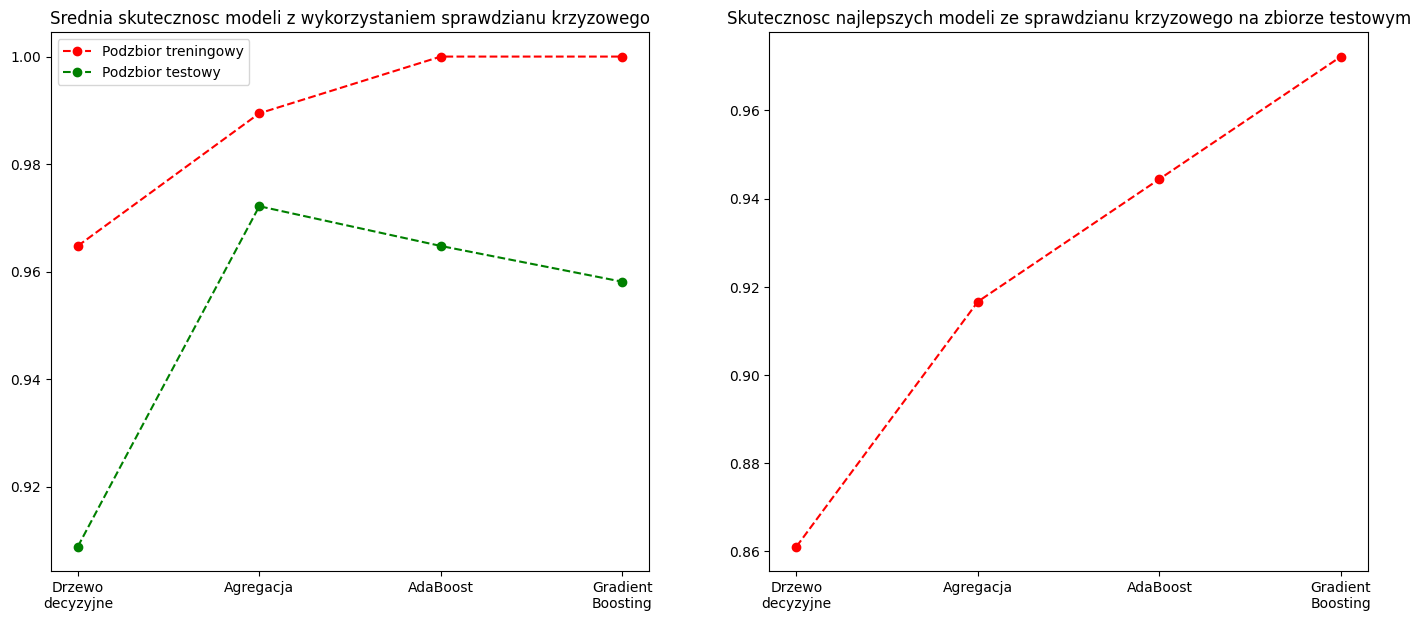

In [8]:
test_scores = [decision_tree_mean_test_score, bagging_mean_test_score, adaboost_mean_test_score, gradient_boosting_mean_test_score]
train_scores = [decision_tree_mean_train_score, bagging_mean_train_score, adaboost_mean_train_score, gradient_boosting_mean_train_score]
indexes = [0, 1, 2, 3]

score_decision_tree = validate_model(best_decision_tree)
score_bagging = validate_model(best_bagging)
score_adaboost = validate_model(best_adaboost)
score_gradient_boosting = validate_model(best_gradient_boosting)

scores = [score_decision_tree, score_bagging, score_adaboost, score_gradient_boosting]

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(17, 7)

ax[0].plot(train_scores, "r--o")
ax[0].plot(test_scores, "g--o")
ax[0].set_xticks(indexes, ["Drzewo\ndecyzyjne", "Agregacja", "AdaBoost", "Gradient\nBoosting"])
ax[0].legend(["Podzbior treningowy", "Podzbior testowy"])
ax[0].set_title("Srednia skutecznosc modeli z wykorzystaniem sprawdzianu krzyzowego")

ax[1].plot(scores, "r--o")
ax[1].set_xticks(indexes, ["Drzewo\ndecyzyjne", "Agregacja", "AdaBoost", "Gradient\nBoosting"])
ax[1].set_title("Skutecznosc najlepszych modeli ze sprawdzianu krzyzowego na zbiorze testowym")

plt.show()